In [1]:
#Importa libs utilizadas no projeto
import pandas as pd
import matplotlib.pyplot as plt
from tkinter import Tk
from tkinter.filedialog import askopenfilename

In [6]:
#Cria interface visual para selecionar o arquivo 'addresses.csv' localizado na pasta data
Tk().withdraw()
file = askopenfilename()


In [8]:
#Cria o dataframe a partir do csv carregado e padroniza os valores None/NaN
df = pd.read_csv(file)
df.columns = ['Name', 'Surname', 'Street', 'State', 'UF', 'Postcode']
df.style.format(na_rep='Missing')

,Name,Surname,Street,State,UF,Postcode
0,Jack,McGinnis,220 hobo Av.,Phila,PA,9119
1,"John ""Da Man""",Repici,120 Jefferson St.,Riverside,NJ,8075
2,Stephen,Tyler,"7452 Terrace ""At the Plaza"" road",SomeTown,SD,91234
3,Missing,Blankman,Missing,SomeTown,SD,298
4,"Joan ""the bone"", Anne",Jet,"9th, at Terrace plc",Desert City,CO,123


In [93]:
#Cria uma estrutura de dados a partir do dataframe anterior para extrair indicadores e criar um novo dataframe
dictionary = {
    'State': [],
    'Count_State': []

}
for state in df['State']:
    if state not in dictionary['State']:
        dictionary['State'].append(state)
        dictionary['Count_State'].append(df.loc[df['State'].isin([state])]['State'].count())

print(dictionary)

{'State': ['Phila', 'Riverside', 'SomeTown', 'Desert City'], 'Count_State': [1, 1, 2, 1]}


In [94]:
#Cria um novo dataframe a partir da estrutura de dados acima
count_states = pd.DataFrame.from_dict(dictionary)

count_states.style

,State,Count_State
0,Phila,1
1,Riverside,1
2,SomeTown,2
3,Desert City,1


<BarContainer object of 5 artists>

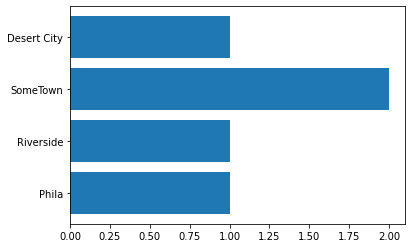

In [89]:
#Usa o dataframe criado a partir do dicionário de indicadores para plotar o gráfico usando matplotlib
plt.barh(count_states['State'], count_states['Count_State'])